In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("class_data_scrs.csv")
data

,Unnamed: 0,category,1,2,3,4,5,6,7
0,0,0,58.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,0,58.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2,0,51.0,1.0,0.0,1.0,9.0,0.0,0.0
3,3,0,51.0,1.0,0.0,1.0,9.0,0.0,0.0
4,4,0,50.0,0.0,0.0,1.0,110.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
351,351,1,58.0,0.0,0.0,1.0,1.0,0.0,0.0
352,352,0,58.0,0.0,0.0,1.0,1.0,0.0,0.0
353,353,0,58.0,0.0,0.0,1.0,1.0,0.0,0.0
354,354,0,46.0,26.0,1.0,1.0,21.0,0.0,0.0


In [3]:
predictors = data.drop(["Unnamed: 0", "category"], axis=1)

In [4]:
target = data["category"]

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: >, <Axes: >]], dtype=object)

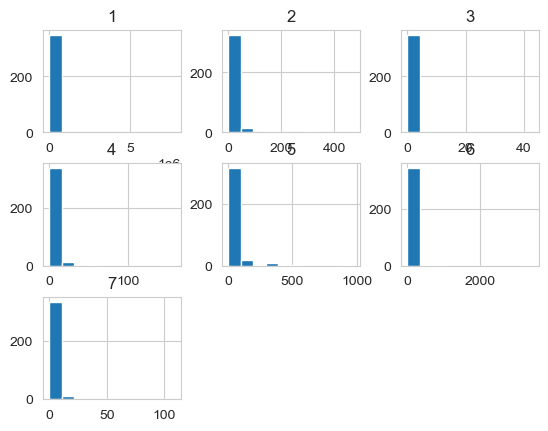

In [5]:
predictors.hist()

In [6]:
predictors.describe()

,1,2,3,4,5,6,7
count,3.560000e+02,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,7.329749e+04,17.640449,0.567416,3.460674,38.640449,39.971910,2.528090
std,6.131056e+05,56.540101,3.661517,13.714231,112.707548,278.089284,10.399989
min,2.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.800000e+01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,5.750000e+01,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000
75%,5.800000e+01,6.000000,0.000000,1.000000,12.000000,0.000000,1.000000
max,7.742508e+06,472.000000,43.000000,159.000000,977.000000,3431.000000,109.000000


array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: >, <Axes: >]], dtype=object)

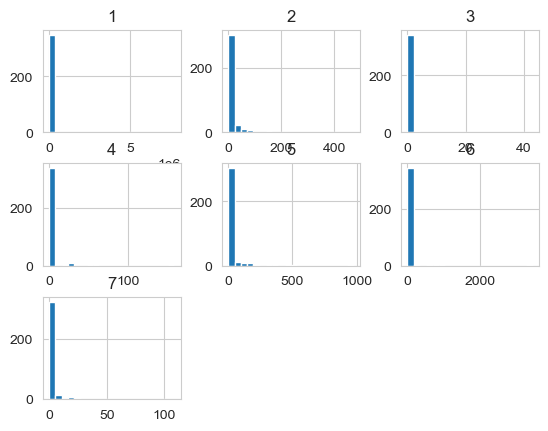

In [7]:
predictors.hist(bins=20)

<Axes: >

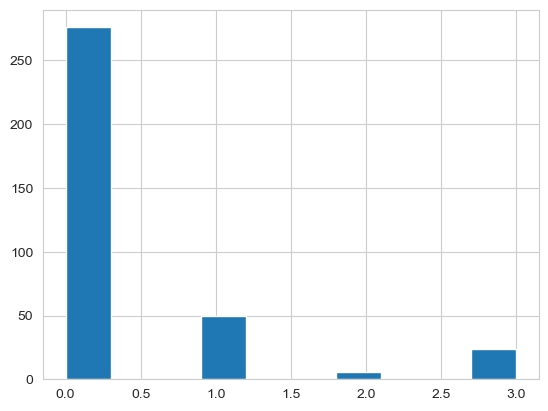

In [8]:
target.hist()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictors, target,
                                                    test_size=0.2, random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

/Users/adiaz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
predictions = clf.predict(X_test)
predictions

array([3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0,
       3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 3, 0, 3])

In [12]:
from sklearn.metrics import (precision_score, accuracy_score, recall_score)

def get_model_metrics(actual, predicted):
    print("Accuracy: %0.2f"%(accuracy_score(actual, predicted)))
    # print("Recall:  %0.2f"%recall_score(actual, predicted))
    # print("Precision:  %0.2f"%precision_score(actual, predicted))

In [13]:
get_model_metrics(y_test, predictions)

Accuracy: 0.54


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[35,  0,  0, 18],
       [10,  0,  0,  2],
       [ 1,  0,  0,  0],
       [ 2,  0,  0,  4]])

In [15]:
predictions = clf.predict(X_train)
get_model_metrics(y_train, predictions)
confusion_matrix(y_train, predictions)

Accuracy: 0.64


array([[171,   0,   0,  52],
       [ 30,   0,   0,   8],
       [  3,   0,   0,   2],
       [  6,   0,   0,  12]])

In [17]:
from sklearn.svm import SVC

In [21]:
kernels = ['rbf', 'poly', 'sigmoid']
results = []
for kernel in kernels:
    svc = SVC(kernel=kernel)
    svc.fit(X_train, y_train)
    predictions = svc.predict(X_train)
    print("Train: Using", kernel, get_model_metrics(y_train, predictions))
    print(confusion_matrix(y_train, predictions))
    predictions = svc.predict(X_test)
    print("Test: Using", kernel, get_model_metrics(y_test, predictions))
    print(confusion_matrix(y_test, predictions))


Accuracy: 0.79
Train: Using rbf None
[[223   0   0   0]
 [ 38   0   0   0]
 [  5   0   0   0]
 [ 18   0   0   0]]
Accuracy: 0.74
Test: Using rbf None
[[53  0  0  0]
 [12  0  0  0]
 [ 1  0  0  0]
 [ 6  0  0  0]]
Accuracy: 0.79
Train: Using poly None
[[223   0   0   0]
 [ 38   0   0   0]
 [  5   0   0   0]
 [ 18   0   0   0]]
Accuracy: 0.74
Test: Using poly None
[[53  0  0  0]
 [12  0  0  0]
 [ 1  0  0  0]
 [ 6  0  0  0]]
Accuracy: 0.78
Train: Using sigmoid None
[[222   0   0   1]
 [ 38   0   0   0]
 [  5   0   0   0]
 [ 18   0   0   0]]
Accuracy: 0.72
Test: Using sigmoid None
[[52  0  0  1]
 [12  0  0  0]
 [ 1  0  0  0]
 [ 6  0  0  0]]


In [45]:

predictions = svc.predict(X_train)
get_model_metrics(y_train, predictions)
confusion_matrix(y_train, predictions)

Accuracy: 0.79


array([[223,   0,   0,   0],
       [ 38,   0,   0,   0],
       [  5,   0,   0,   0],
       [ 18,   0,   0,   0]])

In [47]:
predictions = svc.predict(X_test)
get_model_metrics(y_test, predictions)
confusion_matrix(y_test, predictions)

Accuracy: 0.74


array([[53,  0,  0,  0],
       [12,  0,  0,  0],
       [ 1,  0,  0,  0],
       [ 6,  0,  0,  0]])

In [22]:
predictors.corr()

,1,2,3,4,5,6,7
1,1.000000,0.092763,0.127366,0.389220,0.036633,0.161625,0.043476
2,0.092763,1.000000,0.563790,0.617357,0.554320,0.580617,0.204936
3,0.127366,0.563790,1.000000,0.776210,0.222227,0.817967,0.143163
4,0.389220,0.617357,0.776210,1.000000,0.270412,0.906866,0.212301
5,0.036633,0.554320,0.222227,0.270412,1.000000,0.235103,0.462077
6,0.161625,0.580617,0.817967,0.906866,0.235103,1.000000,0.194273
7,0.043476,0.204936,0.143163,0.212301,0.462077,0.194273,1.000000
